### Softmax classifier for MNIST + using GradientDescentOptimizer

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch: 0001, Cost: 13.149737597
Epoch: 0002, Cost: 11.190150826
Epoch: 0003, Cost: 9.905000720
Epoch: 0004, Cost: 8.963398793
Epoch: 0005, Cost: 8.227733525
Epoch: 0006, Cost: 7.630932511
Epoch: 0007, Cost: 7.129129060
Epoch: 0008, Cost: 6.692301192
Epoch: 0009, Cost: 6.302305709
Epoch: 0010, Cost: 5.949759123
Epoch: 0011, Cost: 5.629493310
Epoch: 0012, Cost: 5.338033149
Epoch: 0013, Cost: 5.072678408
Epoch: 0014, Cost: 4.830986723
Epoch: 0015, Cost: 4.610720544
Epoch: 0016, Cost: 4.409739172
Epoch: 0017, Cost: 4.226170599
Epoch: 0018, Cost: 4.058246940
Epoch: 0019, Cost: 3.904394428
Epoch: 0020, Cost: 3.763198183
Epoch: 0021, Cost: 3.633403289
Epoch: 0022, Cost: 3.513856945
Epoch: 0023, Cost: 3.403523572
Epoch: 0024, Cost: 3.301440805
Epoch: 0025, Cost: 3.206807643
Epoch: 0026, Cost: 3.118896566
Epoch: 0027, Cost: 3.037045508
Epoch: 0028, Cost: 2.960672492
Epoch: 0029, Cost: 2.889265863
Epoch: 0030, Cost: 2.822372587
Epoch: 0031, Cost: 2.759554753
Epoch: 0032, Cost: 2.700484065
Epoch:

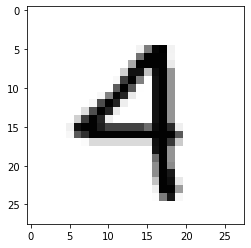

In [7]:
tf.random.set_random_seed(777)
nb_classes = 10

# input placeholders
X = tf.placeholder(tf.float32, shape=[None, 28*28])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([28 * 28, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# hypothesis
hypothesis = tf.matmul(X, W) + b

# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

# define cost function : sigmoid + cost ==> softmax
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=tf.stop_gradient(Y)))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# compute accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

# training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
            
        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")
        
    print("Learning Finished!")

    # Test model and check accuracy
    print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y:mnist.test.labels}))
    
    
    # get one and predict
    import numpy as np
    idx = np.random.choice(mnist.test.num_examples, 1)[0]
    print("Label:", sess.run(tf.argmax(mnist.test.labels[idx:idx+1], axis=1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[idx: idx+1]}))
    
    import matplotlib.pylab as plt
    plt.imshow(mnist.test.images[idx:idx+1].reshape(28, 28), cmap="Greys", interpolation='nearest')
    plt.show()

### Softmax classifier for MNIST + using AdamOptimizer

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 4.531042674
Epoch: 0002, Cost: 1.561328321
Epoch: 0003, Cost: 1.071527543
Epoch: 0004, Cost: 0.861932872
Epoch: 0005, Cost: 0.741294320
Epoch: 0006, Cost: 0.662219081
Epoch: 0007, Cost: 0.605246459
Epoch: 0008, Cost: 0.562254292
Epoch: 0009, Cost: 0.527866924
Epoch: 0010, Cost: 0.500497394
Epoch: 0011, Cost: 0.477142519
Epoch: 0012, Cost: 0.457676141
Epoch: 0013, Cost: 0.440929115
Epoch: 0014, Cost: 0.425966441
Epoch: 0015, Cost: 0.413433797
Epoch: 0016, Cost: 0.401521268
Epoch: 0017, Cost: 0.392043293
Epoch: 0018, Cost: 0.382284101
Epoch: 0019, Cost: 0.374197577
Epoch: 0020, Cost: 0.366788798
Epoch: 0021, Cost: 0.359882501
Epoch: 0022, Cost: 0.353549796
Epoch: 0023, Cost: 0.347388411
Epoch: 0024, Cost: 0.342204496
Epoch: 0025, Cost: 0.336634896
Epoch: 0026, Cost: 0.332245425


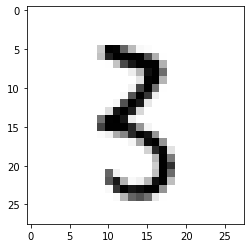

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=hypothesis, labels=tf.stop_gradient(Y)
    )
)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# train my model
with tf.Session() as sess:
    # initialize
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0

        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")

    print("Learning Finished!")

    # Test model and check accuracy
    print(
        "Accuracy:",
        sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis=1)))
    print(
        "Prediction: ",
        sess.run(
            tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r : r + 1]}
        ),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()